## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [11]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [12]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import warnings
warnings.filterwarnings('ignore')

In [13]:
full_pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [14]:
columns_select = ['City Name','Package','Variety','Origin','Item Size','Color']
pumpkins = full_pumpkins.loc[:,columns_select]

In [15]:
pumpkins.dropna(inplace=True)

In [16]:
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


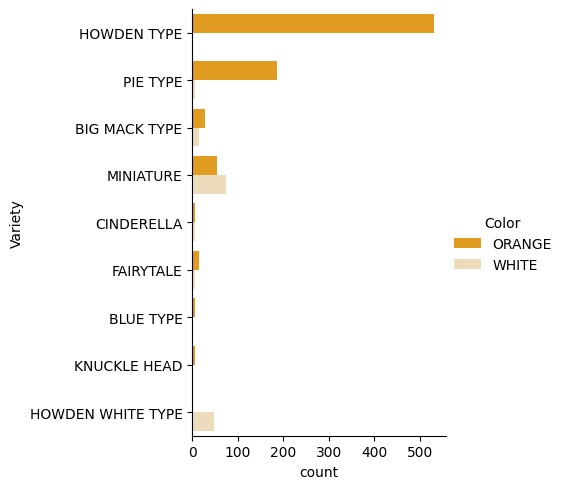

In [17]:
import seaborn as sns

# Specify colors for each values of the hue variable
palette = {'ORANGE':'orange',
           'WHITE':'wheat'
           } 

# Plot a bar to visualize how many pumpkins of each variet are orange or white

sns.catplot(
    data=pumpkins,y='Variety',hue='Color',kind='count',palette=palette
)

In [18]:
# Let's look at the different values of the 'Item Size' column
pumpkins['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [19]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Item size' column using ordinal encoding
item_size_categories = [['sml','med','med-lge','lge','xlge','jbo','exjbo']]
ordinal_features = ['Item Size']

ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [20]:
from sklearn.preprocessing import OneHotEncoder
# Encode all other features using one-hot encoding
categorical_features = ['City Name','Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [21]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('ord',ordinal_encoder,ordinal_features),
    ('cat',categorical_encoder,categorical_features)
]
)

# get the encoded features as a pandas dataframe
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)


In [22]:
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,cat__City Name_NEW YORK,cat__City Name_PHILADELPHIA,cat__City Name_SAN FRANCISCO,cat__City Name_ST. LOUIS,cat__Package_1 1/9 bushel cartons,cat__Package_1 1/9 bushel crates,cat__Package_1/2 bushel cartons,cat__Package_24 inch bins,cat__Package_36 inch bins,cat__Package_bins,cat__Package_bushel cartons,cat__Variety_BIG MACK TYPE,cat__Variety_BLUE TYPE,cat__Variety_CINDERELLA,cat__Variety_FAIRYTALE,cat__Variety_HOWDEN TYPE,cat__Variety_HOWDEN WHITE TYPE,cat__Variety_KNUCKLE HEAD,cat__Variety_MINIATURE,cat__Variety_PIE TYPE,cat__Origin_ALABAMA,cat__Origin_CALIFORNIA,cat__Origin_CANADA,cat__Origin_DELAWARE,cat__Origin_ILLINOIS,cat__Origin_MARYLAND,cat__Origin_MASSACHUSETTS,cat__Origin_MEXICO,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.preprocessing import LabelEncoder
# Encode the color column using label encoding
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,cat__City Name_NEW YORK,cat__City Name_PHILADELPHIA,cat__City Name_SAN FRANCISCO,cat__City Name_ST. LOUIS,cat__Package_1 1/9 bushel cartons,cat__Package_1 1/9 bushel crates,cat__Package_1/2 bushel cartons,cat__Package_24 inch bins,cat__Package_36 inch bins,cat__Package_bins,cat__Package_bushel cartons,cat__Variety_BIG MACK TYPE,cat__Variety_BLUE TYPE,cat__Variety_CINDERELLA,cat__Variety_FAIRYTALE,cat__Variety_HOWDEN TYPE,cat__Variety_HOWDEN WHITE TYPE,cat__Variety_KNUCKLE HEAD,cat__Variety_MINIATURE,cat__Variety_PIE TYPE,cat__Origin_ALABAMA,cat__Origin_CALIFORNIA,cat__Origin_CANADA,cat__Origin_DELAWARE,cat__Origin_ILLINOIS,cat__Origin_MARYLAND,cat__Origin_MASSACHUSETTS,cat__Origin_MEXICO,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
# Let's look at the mapping between the encoded values and original values
list(label_encoder.inverse_transform([0,1]))

['ORANGE', 'WHITE']

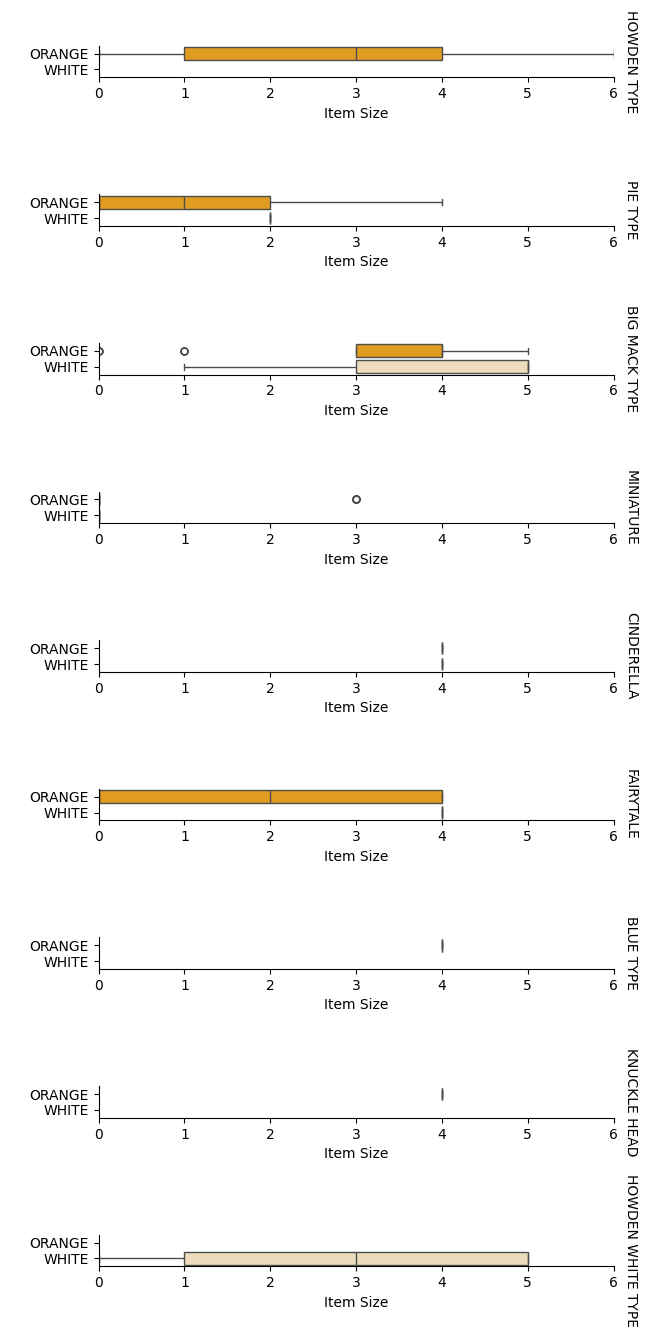

In [25]:
palette = {'ORANGE':'orange',
           'WHITE':'wheat'
           } 
# We need the encoded Item_size column to use it as the x-axis value in the plot
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
    data=pumpkins,
    x='Item Size', y='Color', row='Variety',
    kind='box', orient='h',
    sharex=False,margin_titles=True,
    height=1.5,aspect=4,palette=palette
)

# Defining axis labels
g.set(xlabel="Item Size", ylabel=" ").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

<Axes: xlabel='Color', ylabel='ord__Item Size'>

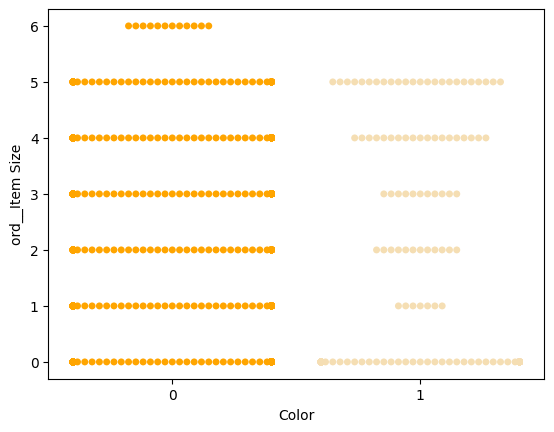

In [26]:
palette ={
    '0':'orange',
    '1':'wheat'
}

sns.swarmplot(x='Color',y='ord__Item Size',data=encoded_pumpkins,palette=palette)

In [27]:
from sklearn.model_selection import train_test_split

# X is th encoded feature
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]

# y is the encoded label
y = encoded_pumpkins['Color']

In [29]:
#X.shape
X.head()

,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,cat__City Name_NEW YORK,cat__City Name_PHILADELPHIA,cat__City Name_SAN FRANCISCO,cat__City Name_ST. LOUIS,cat__Origin_ALABAMA,cat__Origin_CALIFORNIA,cat__Origin_CANADA,cat__Origin_DELAWARE,cat__Origin_ILLINOIS,cat__Origin_MARYLAND,cat__Origin_MASSACHUSETTS,cat__Origin_MEXICO,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,cat__Package_1 1/9 bushel cartons,cat__Package_1 1/9 bushel crates,cat__Package_1/2 bushel cartons,cat__Package_24 inch bins,cat__Package_36 inch bins,cat__Package_bins,cat__Package_bushel cartons,cat__Variety_BIG MACK TYPE,cat__Variety_BLUE TYPE,cat__Variety_CINDERELLA,cat__Variety_FAIRYTALE,cat__Variety_HOWDEN TYPE,cat__Variety_HOWDEN WHITE TYPE,cat__Variety_KNUCKLE HEAD,cat__Variety_MINIATURE,cat__Variety_PIE TYPE,ord__Item Size
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split the data training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)


In [35]:
# Evaluate the models and print the results
print(classification_report(y_test,predictions))
print("Predicted Labels:",predictions)
print()
print("Ground Truth:",list(y_test))
print('F1 Score:',f1_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]

Ground Truth: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[162,   4],
       [ 11,  22]])

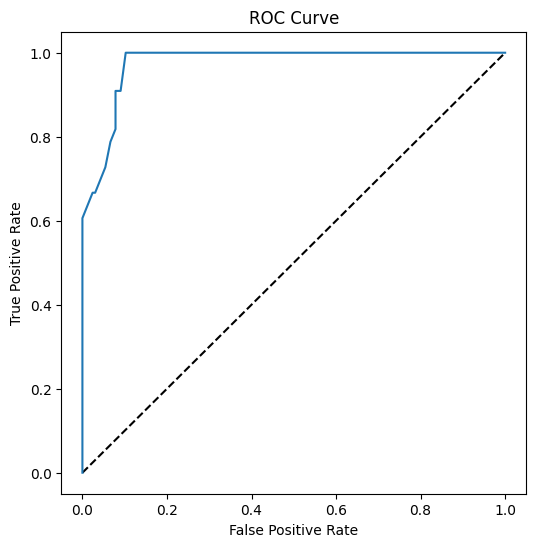

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)

#calculate ROC curves

fpr, tpr, threshold = roc_curve(y_test,y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6,6))

# Plot the diagonal 50% line
plt.plot([0,1],[0,1],'k--')

#Plot the FPR and TPR achieved by our model
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9749908725812341
